## Coefficient of Determination - 𝑅<sup>2</sup> & Adjusted 𝑅<sup>2</sup>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
movie = pd.read_csv("../assets/data/movies_metadata.csv", low_memory= False)

In [38]:
# converting the data type in the column release_date to datetime
# then creating a datetime index with set_index
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [39]:
# sorting the datetime index from past to present
movie.sort_index(inplace = True)

In [40]:
# remove rows with NaT in the index
# otherwise the following step will cause an error
movie = movie[~movie.index.isna()]

In [41]:
# selecting the period from 2010 to 2016
# selecting independent variables:  "budget", "runtime", "vote_average", "popularity"
# vote_average is a rating between 0 and 10 on the movies database
# popularity is the number of times a movie gets searched for or has been added to the wishlist on the movies database
df = movie.loc["2010":"2016", ["title", "budget", "revenue", "runtime", "vote_average", "popularity"]].copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12262 entries, 2010-01-01 to 2016-12-30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         12262 non-null  object 
 1   budget        12262 non-null  object 
 2   revenue       12262 non-null  float64
 3   runtime       12178 non-null  float64
 4   vote_average  12262 non-null  float64
 5   popularity    12262 non-null  object 
dtypes: float64(3), object(3)
memory usage: 670.6+ KB


In [43]:
# transforming the data type in the budget column
df.budget = pd.to_numeric(df.budget, errors = "coerce")

In [44]:
# transforming the data type in the popularity column
df.popularity = pd.to_numeric(df.popularity, errors = "coerce")

In [45]:
# we only want movies with a revenue > 0 and a budget > 0
df = df[(df.revenue > 0) & (df.budget > 0)]

In [46]:
df.set_index("title", inplace = True) # dropping the release date and setting the title as the new index

In [47]:
# converting to million us$
df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000

/var/folders/7c/6tn50bjd30l3zb0p8_7mr94m0000gn/T/ipykernel_60144/647068271.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  7.   19.   40.  ...  10.4 108.    7. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000


In [48]:
df.describe()

,budget,revenue,runtime,vote_average,popularity
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,37.890643,115.641690,110.029955,6.246399,11.069328
std,50.097848,208.966838,21.703204,0.857069,18.488345
min,0.000001,0.000001,0.000000,0.000000,0.016219
25%,6.200000,5.728213,96.000000,5.700000,6.091224
50%,18.700000,35.692920,107.000000,6.300000,8.896679
75%,45.000000,122.513057,120.000000,6.800000,12.572718
max,380.000000,2068.223624,338.000000,9.000000,547.488298


### Multiple Regression Analysis (OLS) with statsmodels

In [49]:
from statsmodels.formula.api import ols

In [50]:
df

,budget,revenue,runtime,vote_average,popularity
title,,,,,
Ca$h,7.0,0.046488,108.0,6.0,9.107829
Leap Year,19.0,29.922472,100.0,6.5,7.432311
Morning Glory,40.0,58.785180,102.0,6.1,10.771255
Devil,10.0,33.583175,80.0,5.8,7.094276
Tooth Fairy,48.0,112.462508,101.0,5.2,6.744680
...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0,312.242626,107.0,5.9,0.755710
Railroad Tigers,50.0,102.205175,124.0,6.2,3.798504
Dangal,10.4,310.000000,161.0,8.0,8.792104


In [51]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45376 entries, 1874-12-09 to 2020-12-16
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45376 non-null  object 
 1   belongs_to_collection  4488 non-null   object 
 2   budget                 45376 non-null  object 
 3   genres                 45376 non-null  object 
 4   homepage               7766 non-null   object 
 5   id                     45376 non-null  object 
 6   imdb_id                45362 non-null  object 
 7   original_language      45365 non-null  object 
 8   original_title         45376 non-null  object 
 9   overview               44435 non-null  object 
 10  popularity             45376 non-null  object 
 11  poster_path            45037 non-null  object 
 12  production_companies   45376 non-null  object 
 13  production_countries   45376 non-null  object 
 14  revenue                45376 non-null

In [52]:
# for the ols function of statsmodels we have to define a formula as this string
# first we have the revenue column where we have the dependent variable 
# we have budget as the first independent variable and then we add some more independent variables with the plus sign
# we take all the data from the dataframe df
model = ols("revenue ~ budget + runtime + vote_average + popularity", data = df) # creating a multiple linear regression model

In [53]:
model

In [54]:
results = model.fit() # fitting the model

In [55]:
results.params # getting the regression coefficients
# we get the intercept and the slopes for the independent variables

Intercept      -202.885651
budget            3.083032
runtime          -0.117440
vote_average     30.711734
popularity        2.059151
dtype: float64

#### Visualizing and comparing the actual values for the dependent variable and the forecasted values

In [56]:
#  creating the values forecasted by the regression model with the predict method
results.predict()

array([  9.03687126,  58.87850165, 117.97799931, ...,  74.06821345,
       346.41242563,  49.2107336 ])

In [57]:
# inserting the new column predict before the index position
df.insert(loc = 2, column = "predict", value = results.predict())

In [58]:
df

,budget,revenue,predict,runtime,vote_average,popularity
title,,,,,,
Ca$h,7.0,0.046488,9.036871,108.0,6.0,9.107829
Leap Year,19.0,29.922472,58.878502,100.0,6.5,7.432311
Morning Glory,40.0,58.785180,117.977999,102.0,6.1,10.771255
Devil,10.0,33.583175,11.285727,80.0,5.8,7.094276
Tooth Fairy,48.0,112.462508,106.827813,101.0,5.2,6.744680
...,...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0,312.242626,90.624936,107.0,5.9,0.755710
Railroad Tigers,50.0,102.205175,134.937875,124.0,6.2,3.798504
Dangal,10.4,310.000000,74.068213,161.0,8.0,8.792104


In [59]:
# distance between actual value and predicted value are the residuals
df.revenue - df.predict

title
Ca$h                                 -8.990383
Leap Year                           -28.956030
Morning Glory                       -59.192819
Devil                                22.297448
Tooth Fairy                           5.634695
                                       ...    
Resident Evil: The Final Chapter    221.617690
Railroad Tigers                     -32.732700
Dangal                              235.931787
Live by Night                      -323.733871
20th Century Women                  -43.394523
Length: 1569, dtype: float64

In [60]:
results.resid # residuals from statsmodels

title
Ca$h                                 -8.990383
Leap Year                           -28.956030
Morning Glory                       -59.192819
Devil                                22.297448
Tooth Fairy                           5.634695
                                       ...    
Resident Evil: The Final Chapter    221.617690
Railroad Tigers                     -32.732700
Dangal                              235.931787
Live by Night                      -323.733871
20th Century Women                  -43.394523
Length: 1569, dtype: float64

In [61]:
# to actually visualize actual values versus forecasted values
# first let's sort the rows by the revenue column and reset the index to a range index
# re-sortig by the revenue column from low to high
df = df.sort_values("revenue").reset_index()

In [62]:
df

,title,budget,revenue,predict,runtime,vote_average,popularity
0,The Letters,0.000001,0.000001,-39.675047,114.0,5.6,2.240259
1,All at Once,0.750000,0.000003,-15.887888,0.0,6.0,0.201582
2,Duniyadari,0.390000,0.000003,-219.030963,148.0,0.0,0.016219
3,Raja Natwarlal,0.000005,0.000004,-48.245394,141.0,5.5,1.109545
4,Bodyguard,0.000130,0.000008,-53.505265,130.0,5.2,2.402032
...,...,...,...,...,...,...,...
1564,Avengers: Age of Ultron,280.000000,1405.403694,944.969940,141.0,7.3,37.379420
1565,Furious 7,190.000000,1506.249360,647.161668,137.0,7.3,27.275687
1566,Jurassic World,150.000000,1513.528810,512.153481,124.0,6.5,32.790475
1567,The Avengers,220.000000,1519.557910,870.946647,143.0,7.4,89.887648


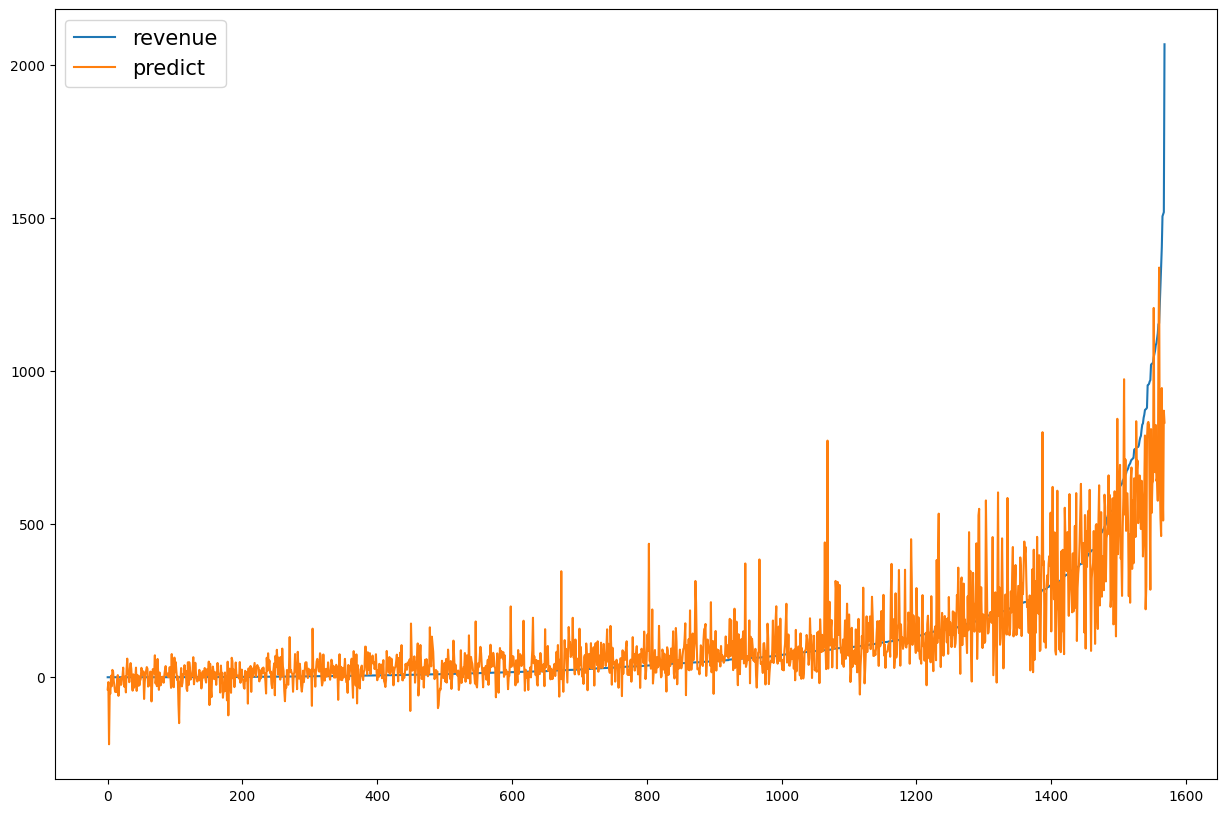

In [63]:
# creating a line plot for the revenue column and also for the predict column
df.loc[:, ["revenue", "predict"]].plot(figsize = (15, 10))
plt.legend(fontsize = 15)
plt.show()

In [64]:
results.ssr # sum of squared errors

np.float64(21611479.348156683)

In [65]:
results.mse_resid # mean squared error in square units

np.float64(13818.081424652612)

In [66]:
# as the mean squared error in square units we take the square root to get a number that we can interpret
# by taking the square root we get to 170 and million dollar.
# which is actually the mean of the average error of our regression model
# so on average the the truer revenue is plus or minus 117 million away from the predicted values.
    
results.mse_resid**0.5

np.float64(117.55033570625228)

***The mean error seems to be pretty high but to evaluate and to verify the fit of our model we need to calculate the coefficient of determination.***

In [67]:
## Coefficient of Determination - 𝑅<sup>2</sup> & Adjusted 𝑅<sup>2</sup>

#### __How well does the model fit the data & explain the dependent variable?__

𝑅<sup>2</sup> is defined as the **proportion of the variation in the dependent variable** that is collectively
explained by all of the independent variables (or the regression model).

<img src="../assets/images/r_squared_formula_2.png" width="50%" />

The problem that we have here is, that 𝑅<sup>2</sup> may not be a reliable measure of the explanatory power of the multiple regression model. The reason for this is that *𝑅<sup>2</sup> almost always increases as variables are added to the model, even if the marginal contribution of the new variables is not significant.*

The solution for this is to use the __Adjusted 𝑅<sup>2</sup>__ instead of 𝑅<sup>2</sup>. When we add new variables to the model the **Adjusted 𝑅<sup>2</sup> increases or decreases depending on the new variable's marginal contribution**.

__Therefore the Adjusted 𝑅<sup>2</sup> is always less than 𝑅<sup>2</sup>.__

<img src="../assets/images/adjusted_r_squared_formula.png" width="80%" />


In [68]:
results.rsquared

np.float64(0.6843660611789256)

In [69]:
results.rsquared_adj

np.float64(0.6835588132535521)

In our example the Adjusted 𝑅<sup>2</sup> (68.36 %) is only slightly lower than 𝑅<sup>2</sup> (68.43 %).

***We can conclude, that the four independent variables and our model as a whole explain 68.36 % of the total variation in the independent variable.***

### Regression Coefficients, Hypothesis Testing & Model Specification

In [70]:
pd.options.display.float_format = '{:.4f}'.format

In [71]:
df

,title,budget,revenue,predict,runtime,vote_average,popularity
0,The Letters,0.0000,0.0000,-39.6750,114.0000,5.6000,2.2403
1,All at Once,0.7500,0.0000,-15.8879,0.0000,6.0000,0.2016
2,Duniyadari,0.3900,0.0000,-219.0310,148.0000,0.0000,0.0162
3,Raja Natwarlal,0.0000,0.0000,-48.2454,141.0000,5.5000,1.1095
4,Bodyguard,0.0001,0.0000,-53.5053,130.0000,5.2000,2.4020
...,...,...,...,...,...,...,...
1564,Avengers: Age of Ultron,280.0000,1405.4037,944.9699,141.0000,7.3000,37.3794
1565,Furious 7,190.0000,1506.2494,647.1617,137.0000,7.3000,27.2757
1566,Jurassic World,150.0000,1513.5288,512.1535,124.0000,6.5000,32.7905
1567,The Avengers,220.0000,1519.5579,870.9466,143.0000,7.4000,89.8876


In [72]:
results.params

Intercept      -202.8857
budget            3.0830
runtime          -0.1174
vote_average     30.7117
popularity        2.0592
dtype: float64

In [73]:
results.tvalues

Intercept      -8.6450
budget         49.1353
runtime        -0.7983
vote_average    8.3246
popularity     12.2409
dtype: float64

In [74]:
results.pvalues

Intercept      0.0000
budget         0.0000
runtime        0.4248
vote_average   0.0000
popularity     0.0000
dtype: float64

In [75]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     847.8
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:02:39   Log-Likelihood:                -9703.0
No. Observations:                1569   AIC:                         1.942e+04
Df Residuals:                    1564   BIC:                         1.944e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -202.8857     23.469     -8.645   

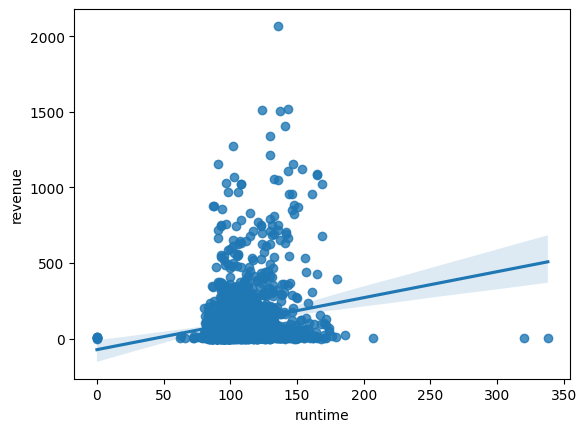

In [76]:
sns.regplot(x = "runtime", y = "revenue", data = df)
plt.show()

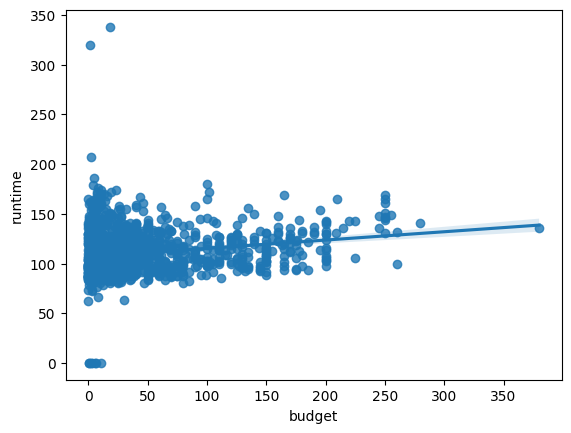

In [77]:
sns.regplot(x = "budget", y = "runtime", data = df)
plt.show()

In [78]:
# for the ols function of statsmodels we have to define a formula as this string
# first we have the revenue column where we have the dependent variable 
# we have budget as the first independent variable and then we add some more independent variables with the plus sign
# we take all the data from the dataframe df
model = ols("revenue ~  budget + vote_average + popularity", data = df) # creating a multiple linear regression model

In [79]:
results = model.fit() # fitting the model

In [80]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1130.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:03:45   Log-Likelihood:                -9703.3
No. Observations:                1569   AIC:                         1.941e+04
Df Residuals:                    1565   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -209.6573     21.879     -9.583   